Dataset sacado de: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [2]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [9]:
#Importando datasets y transformandolos en DataFrames

df = pd.read_csv(r'../TemporalMLStuff/Datasets/mnist_train.csv')
df_test = pd.read_csv(r'../TemporalMLStuff/Datasets/mnist_test.csv')

df
#Hay una version más pequeña de 8x8

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

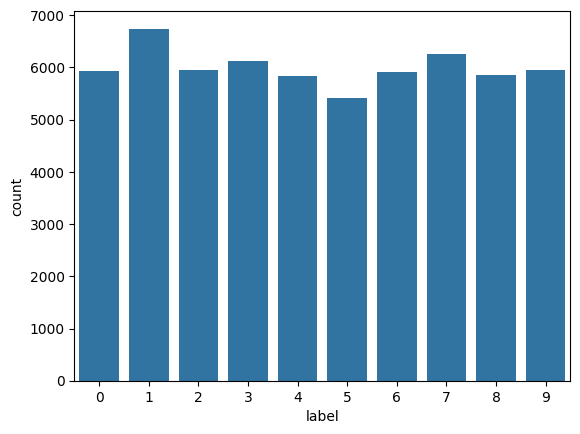

In [12]:
#Mirando como están distribuidas las clases
sns.countplot(data=df, x='label')

In [ ]:
#Haciendo regresión logistica
X_train = df.drop('label', axis = 1)
y_train = df['label']

X_test = df_test.drop('label', axis = 1)
y_test = df_test['label']

#Estandarizando datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=5000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=5000, random_state=0)

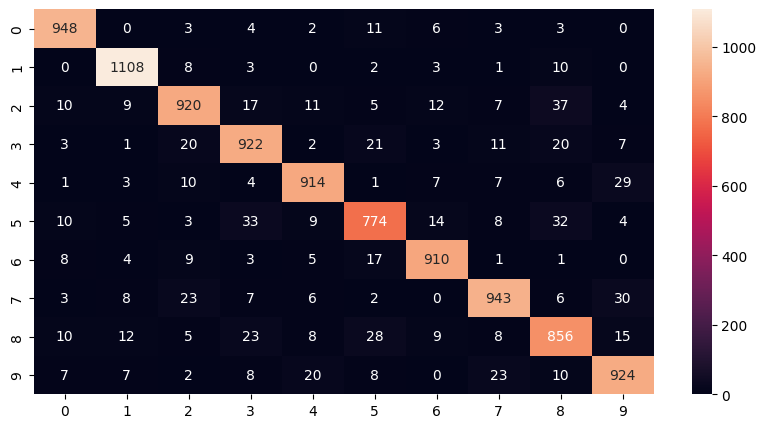

In [ ]:
#Haciendo matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
#Calculando metricas de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



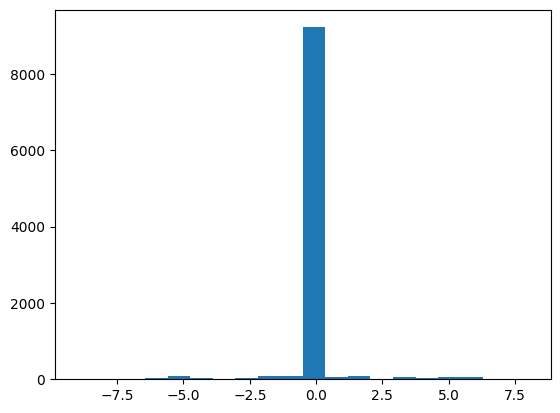

label
 0    9219
-2      93
 2      84
-5      80
-1      77
 5      70
 1      64
 3      51
 6      51
-3      46
-4      38
 4      37
-6      29
-7      17
 7      17
-8      17
-9       7
 8       3
Name: count, dtype: int64


In [ ]:
y_pred = classifier.predict(X_test)
error = y_pred - y_test
plt.hist(error, bins=20)
plt.show()
print(error.value_counts())


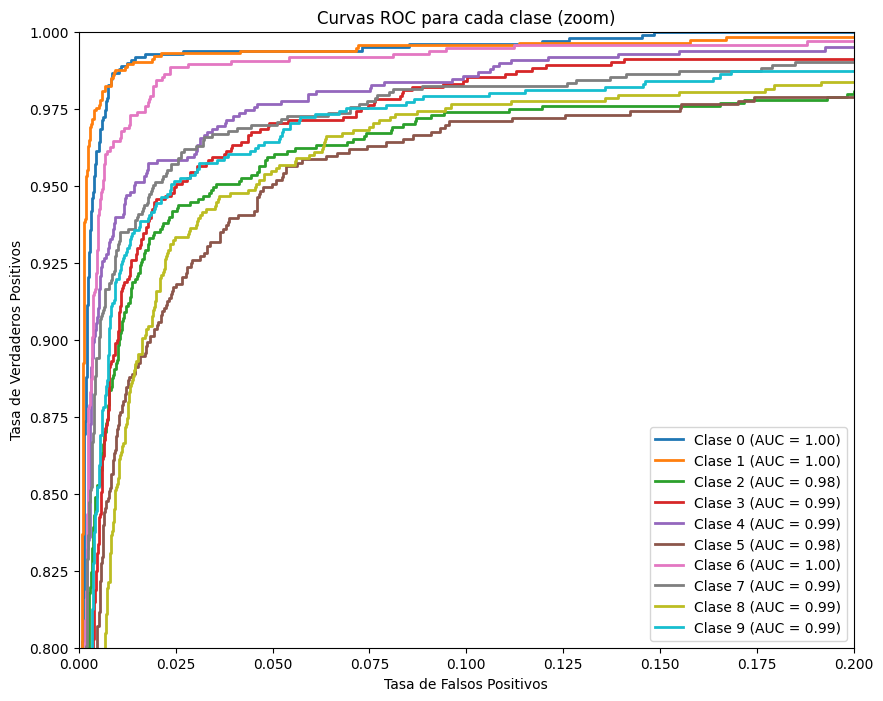

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=range(10))

# Calcular las probabilidades de predicción
y_pred_proba = classifier.predict_proba(X_test)

# Calcular y graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Clase %d (AUC = %0.2f)' % (i, roc_auc), linewidth=2)

plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada clase (zoom)')
plt.legend(loc="lower right")
plt.show()


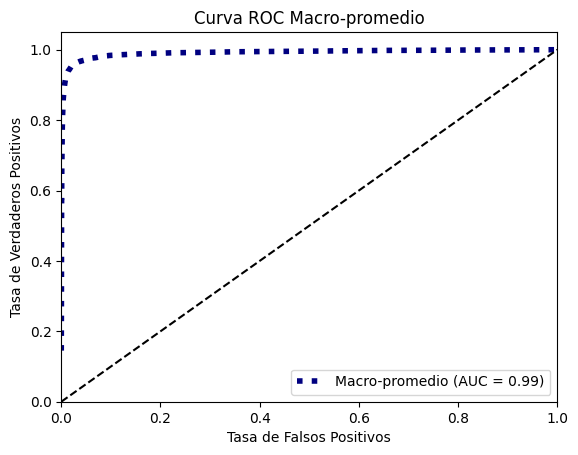

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=range(10))

# Calcular las probabilidades de predicción
y_pred_proba = classifier.predict_proba(X_test)

# Calcular las tasas de verdaderos y falsos positivos para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de las tasas de verdaderos y falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 10

# Calcular el AUC de la curva ROC promediada
macro_roc_auc = auc(all_fpr, mean_tpr)

# Graficar la curva ROC promediada
plt.figure()
plt.plot(all_fpr, mean_tpr, label='Macro-promedio (AUC = %0.2f)' % macro_roc_auc, color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Macro-promedio')
plt.legend(loc="lower right")
plt.show()

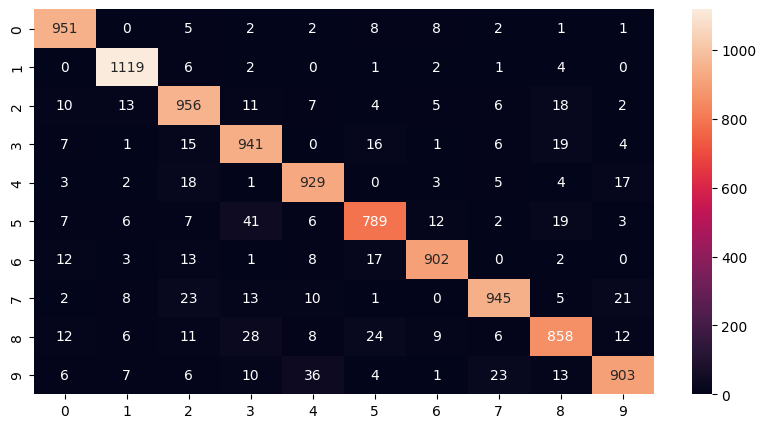

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.93      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.94      0.89      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



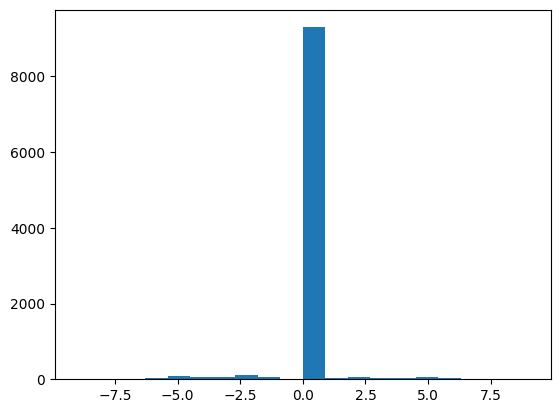

label
 0    9293
-2     111
-5      97
-1      71
 2      58
 5      52
-3      52
-4      47
 1      46
-6      41
 3      31
 6      31
 4      21
-8      19
-7      14
 7       8
-9       6
 9       1
 8       1
Name: count, dtype: int64


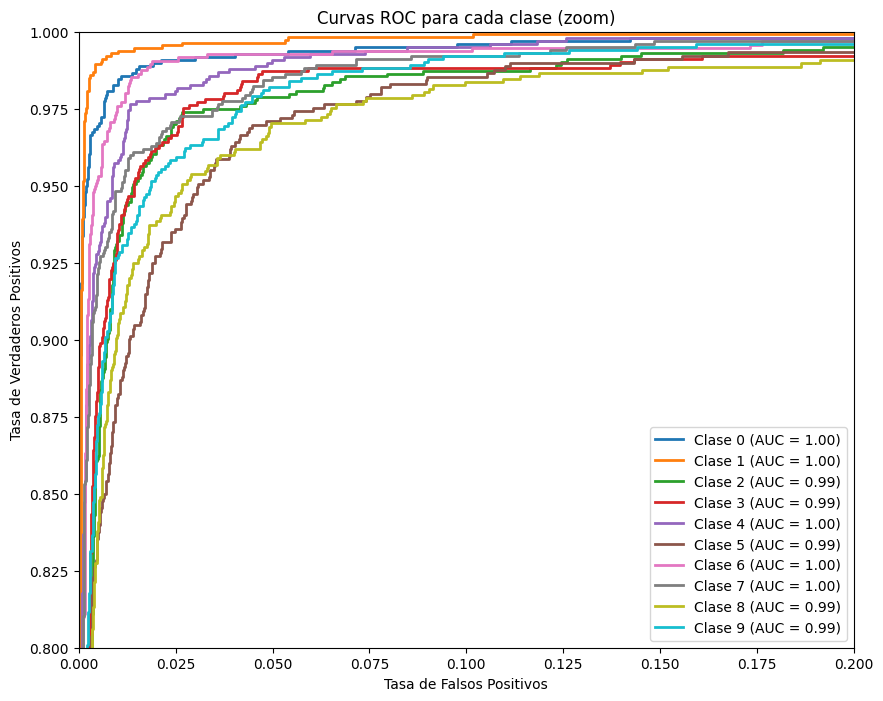

In [ ]:
#Probando un modelo de SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

#Haciendo matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Calculando metricas de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

y_pred = classifier.predict(X_test)
error = y_pred - y_test
plt.hist(error, bins=20)
plt.show()
print(error.value_counts())

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=range(10))

# Calcular las probabilidades de predicción
y_pred_proba = classifier.predict_proba(X_test)

# Calcular y graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Clase %d (AUC = %0.2f)' % (i, roc_auc), linewidth=2)

plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada clase (zoom)')
plt.legend(loc="lower right")
plt.show()


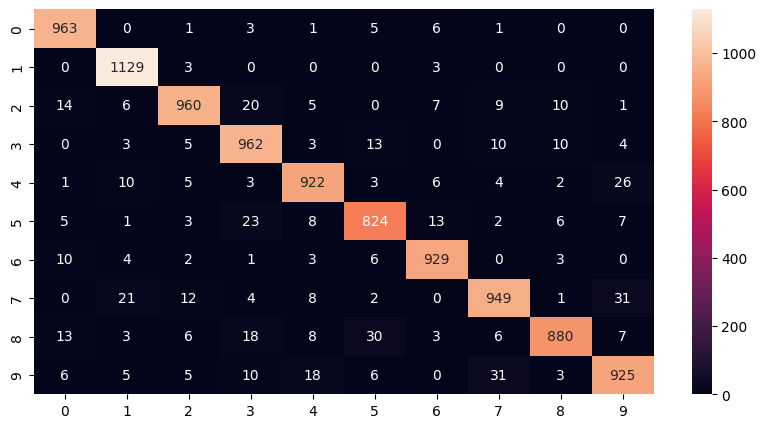

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



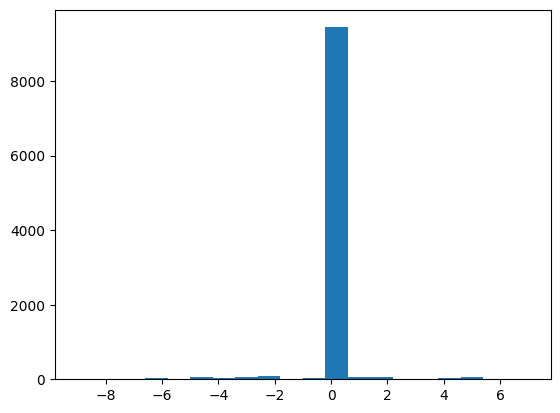

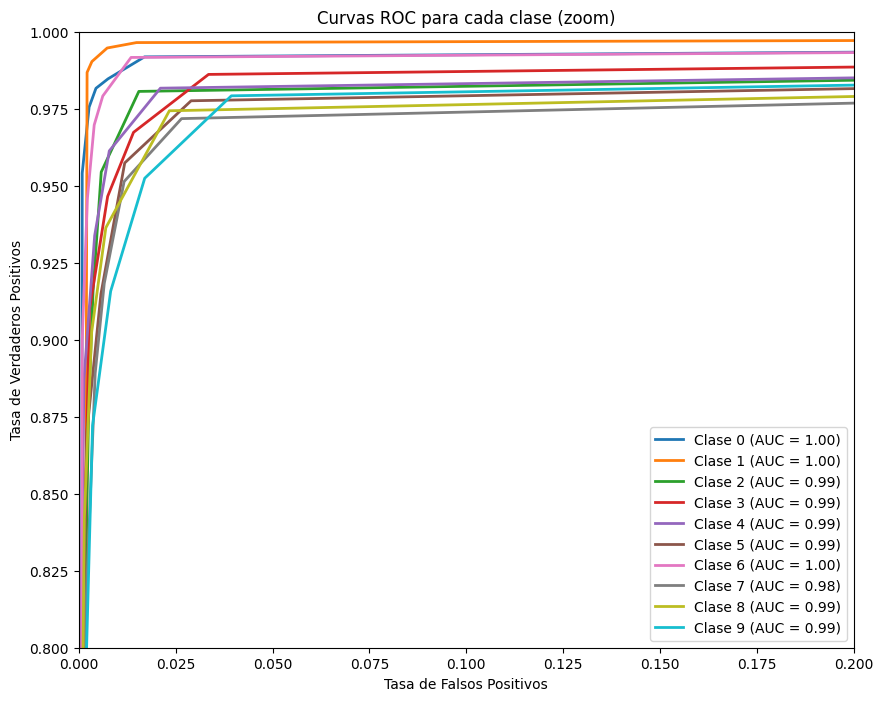

In [11]:
#Probando un modelo de KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)


#Haciendo matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Calculando metricas de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Graficando histograma de error
y_pred = classifier.predict(X_test)
error = y_pred - y_test
plt.hist(error, bins=20)
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=range(10))

# Calcular las probabilidades de predicción
y_pred_proba = classifier.predict_proba(X_test)

# Calcular y graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Clase %d (AUC = %0.2f)' % (i, roc_auc), linewidth=2)

plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada clase (zoom)')
plt.legend(loc="lower right")
plt.show()